# Problem

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from statsmodels.tsa.arima.model import ARIMA as ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy import stats

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [3]:
# Load data in separate cell, it takes too long to keep reloading
data = pd.read_excel("compiled.xlsx")

#### Data Preparation

In [4]:
data = data[(data['store_nbr'] == 1) & (data['family'] == 'BREAD/BAKERY')].copy()
data.index = pd.to_datetime(data['date'])
data_week = data.resample('W').mean()
data_week = data_week.reset_index()

Text(0.5, 1.0, 'Average Daily Sales per Week')

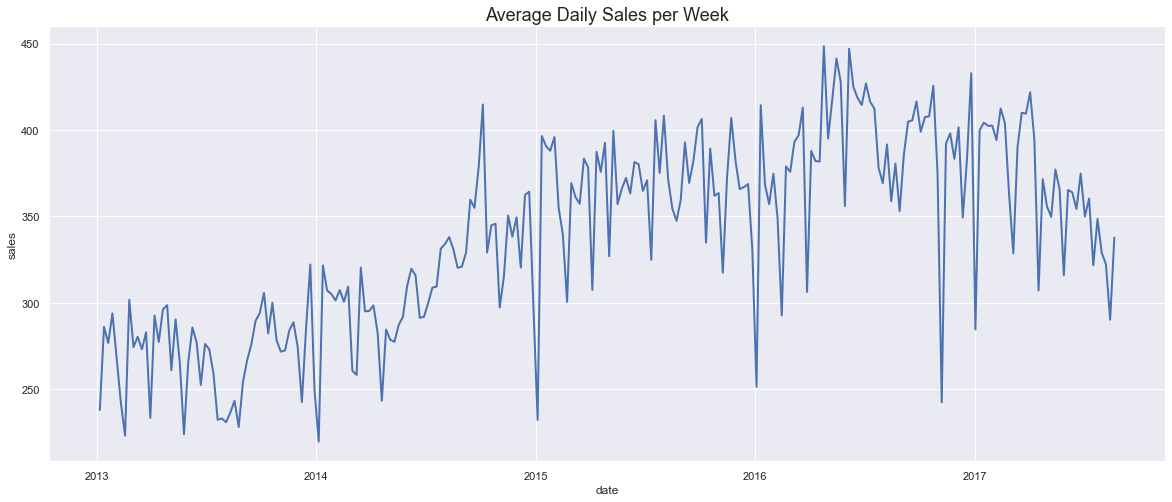

In [5]:
fig = plt.figure(figsize = (20, 8))
sb.lineplot(x = data_week['date'], y= data_week['sales'], linewidth=2)
plt.title("Average Daily Sales per Week",
          fontsize = 18)

In [6]:
data.index = pd.to_datetime(data['date'])
data_month = data.resample('M').mean()
data_month = data_month.reset_index()

Text(0.5, 1.0, 'Average Daily Sales per Month')

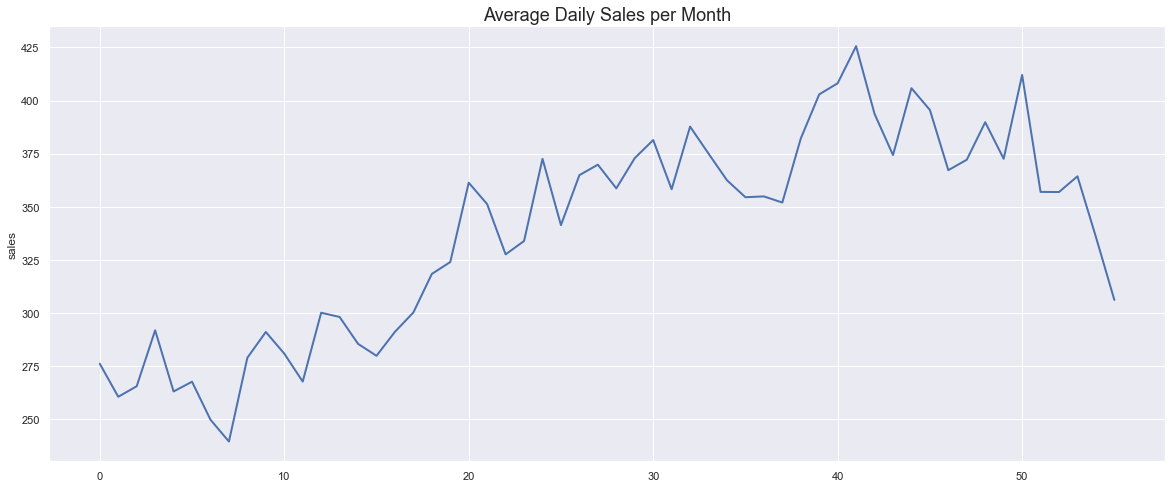

In [7]:
fig = plt.figure(figsize = (20, 8))
sb.lineplot(x = data_month.index, y= data_month['sales'], linewidth=2)
plt.title("Average Daily Sales per Month",
          fontsize = 18)

In [8]:
# Get the total length of the data
total_length = len(data_month)

# Define the train and test length
train_length = int(total_length * 0.80)
test_length = total_length - train_length

# Split the data into train and test
train_data = data_month.iloc[:train_length]
test_data = data_month.iloc[train_length:]

In [9]:
from pmdarima import auto_arima

In [10]:
model_fit = auto_arima(train_data['sales'],
                       m=12,
                       d=0,
                       D=0,
                       max_order=None,                       
                       max_p=7,
                       max_q=7,
                       max_d=2,
                       max_P=4,
                       max_Q=4,
                       max_D=2,
                       maxiter = 50,
                       alpha = 0.05,
                       n_jobs = -1,
                       seasonal=True,
                       trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)

model_fit.summary()

C:\Users\ASUS\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=395.493, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=471.254, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=389.531, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=638.014, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=392.579, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=391.485, Time=0.38 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=391.354, Time=0.31 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=389.887, Time=0.10 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=468.361, Time=0.09 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=391.328, Time=0.24 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=391.215, Time=0.20 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=432.356, Time=0.26 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   44
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -190.765
Date:                            Tue, 28 Mar 2023   AIC                            389.531
Time:                                    00:22:54   BIC                            396.667
Sample:                                         0   HQIC                           392.177
                                             - 44                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     17.6817     13.124      1.347      0.178      -8.041      43.404
ar.L1          0.9104      0.067     13.687      0.000       0.780       1.041
ar.S.L12       0.3963      0.167      2.374      0.018       0.069       0.724
sigma2       311.1621    116.139      2.679      0.007      83.534     538.790
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 2.97
Prob(Q):                              0.70   Prob(JB):                         0.23
Heteroskedasticity (H):               0.79   Skew:                            -0.02
Prob(H) (two-sided):                  0.65   Kurtosis:                         1.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
model_fit

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True)

<AxesSubplot:>

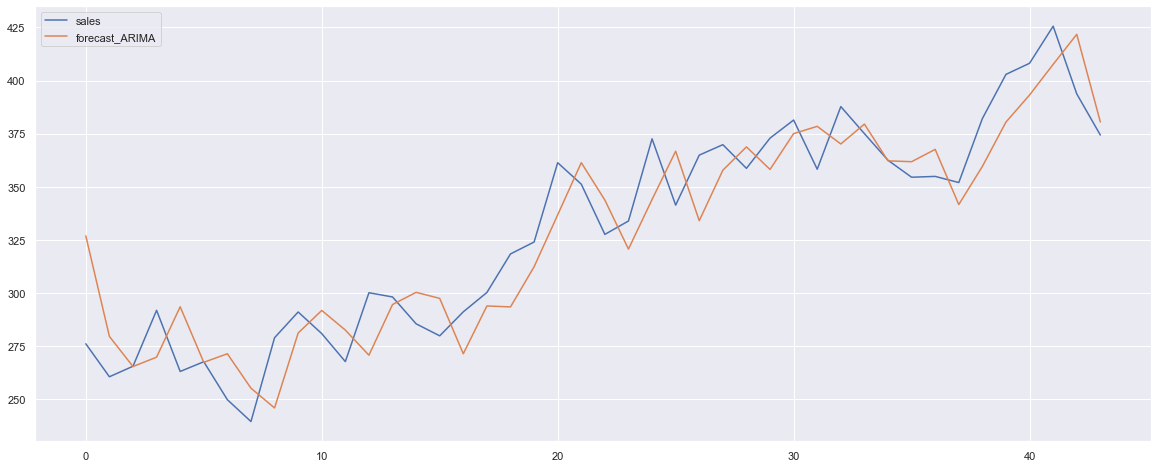

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the ARIMA model
model_ARIMA = ARIMA(train_data['sales'],
              order=(1,0,0),
              seasonal_order=(1, 0, 0, 12)
            )

# Fit the model
model_ARIMA = model_ARIMA.fit()

train_forecast = train_data.copy()
test_forecast = test_data.copy()

train_forecast['forecast_ARIMA'] = model_ARIMA.predict()
train_forecast[['sales','forecast_ARIMA']].plot(figsize=(20,8))

<AxesSubplot:>

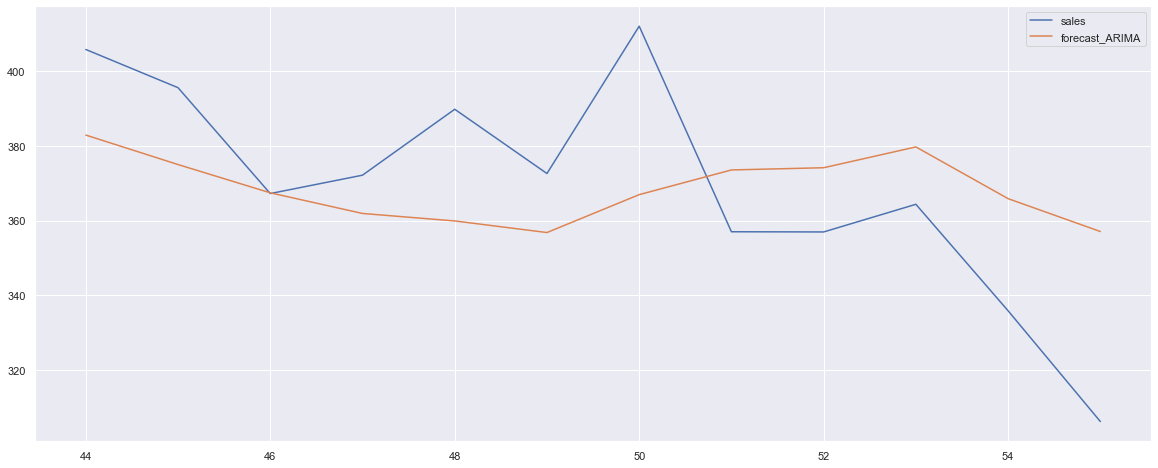

In [13]:
end = train_length + test_length - 1

test_forecast['forecast_ARIMA'] = model_ARIMA.predict(start=train_length, end=end, dynamic=False)
test_forecast[['sales','forecast_ARIMA']].plot(figsize=(20,8))

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("RMSE of Auto ARIMA:", np.sqrt(mean_squared_error(test_forecast['sales'], test_forecast['forecast_ARIMA'])))
print("MAE of Auto ARIMA:", mean_absolute_error(test_forecast['sales'], test_forecast['forecast_ARIMA']))

RMSE of Auto ARIMA: 26.663400773681925
MAE of Auto ARIMA: 22.90186255469848
